In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [13]:
df_all = pd.read_csv(r'C:\Users\20193703\Documents\University\Data challenge\CSV\topicairlinesentiment_correct.csv')
df_all

,Unnamed: 0,id_str,KLM,British Airways,American Air,Lufthansa,RyanAir,Topic,sentiment,Date
0,0,1131172858951024640,0,0,0,0,0,NaN,0,2019-05-22 12:20:00.406000
1,1,1131172864147808256,0,0,0,0,0,99.0,99,99
2,2,1131172867985485824,0,1,0,0,0,NaN,0,2019-05-22 12:20:02.560000
3,3,1131172909463027712,0,0,1,0,0,99.0,99,99
4,4,1131172975682605056,0,0,0,0,0,NaN,0,2019-05-22 12:20:28.237000
...,...,...,...,...,...,...,...,...,...,...
6451960,6454270,1244696703690772480,0,0,0,0,0,NaN,0,2020-03-30 18:43:14.163000
6451961,6454271,1244696708983984128,0,0,0,0,0,NaN,1,2020-03-30 18:43:15.425000
6451962,6454272,1244696710447800320,1,0,0,0,0,NaN,0,2020-03-30 18:43:15.774000
6451963,6454273,1244696713350217728,0,0,0,0,0,NaN,0,2020-03-30 18:43:16.466000


In [92]:
topic_dict = {
    '1' : 'baggage',
    '2' : 'delay',
    '3' : 'pollute',
    '4' : 'cancel',
    '5' : 'service',
    '6' : 'ticket',
    '7' : 'corona'
}

In [11]:
for i in range(len(df_all)):
    if df_all['sentiment'].iat[i] != 99:
        df_all_new = df_all.loc[i]

In [16]:
df_correct = df_all[df_all['sentiment']!=99]
df_correct

,Unnamed: 0,id_str,KLM,British Airways,American Air,Lufthansa,RyanAir,Topic,sentiment,Date
0,0,1131172858951024640,0,0,0,0,0,NaN,0,2019-05-22 12:20:00.406000
2,2,1131172867985485824,0,1,0,0,0,NaN,0,2019-05-22 12:20:02.560000
4,4,1131172975682605056,0,0,0,0,0,NaN,0,2019-05-22 12:20:28.237000
5,5,1131173010235375616,0,0,0,0,0,NaN,-1,2019-05-22 12:20:36.475000
9,9,1131173091651072000,0,0,0,0,0,NaN,0,2019-05-22 12:20:55.886000
...,...,...,...,...,...,...,...,...,...,...
6451960,6454270,1244696703690772480,0,0,0,0,0,NaN,0,2020-03-30 18:43:14.163000
6451961,6454271,1244696708983984128,0,0,0,0,0,NaN,1,2020-03-30 18:43:15.425000
6451962,6454272,1244696710447800320,1,0,0,0,0,NaN,0,2020-03-30 18:43:15.774000
6451963,6454273,1244696713350217728,0,0,0,0,0,NaN,0,2020-03-30 18:43:16.466000


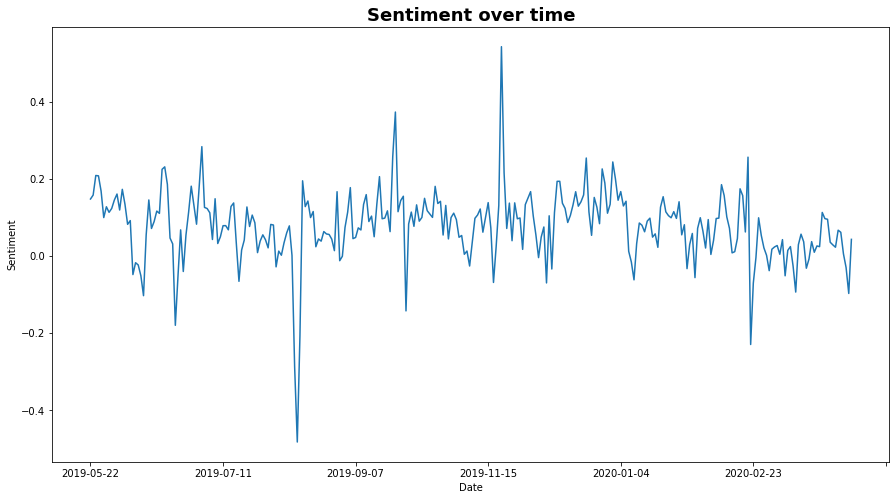

In [221]:
ax = df_correct.groupby('newDate')['sentiment'].mean().plot(figsize=(15,8))
ax.set_title('Sentiment over time', size= 18, weight = 'bold')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment');
plt.savefig('SentimentTime.png')


In [134]:
df_correct['newDate'] = 'nan'
for i in range(len(df_correct)):
    df_correct['newDate'].iat[i] = str(df_correct['Date'].iat[i]).split()[0]

C:\Users\20193703\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
df_correct['newTopic'] = 'nan'
for i in range(len(df_correct)):
    if not math.isnan(df_correct['Topic'].iat[i]):
        df_correct['newTopic'].iat[i] = [*str(int(df_correct['Topic'].iat[i]))]

C:\Users\20193703\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
for key in topic_dict:
    df_correct[topic_dict[key]] = 'nan'
for i in range(len(df_correct)):
    for key in topic_dict:
        if key in df_correct['newTopic'].iat[i]:
            df_correct[topic_dict[key]].iat[i] = 1
        else:
            df_correct[topic_dict[key]].iat[i] = 0

C:\Users\20193703\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
df_correct.head()

,Unnamed: 0,id_str,KLM,British Airways,American Air,Lufthansa,RyanAir,Topic,sentiment,Date,newDate,newTopic,baggage,delay,pollute,cancel,service,ticket,corona
0,0,1131172858951024640,0,0,0,0,0,NaN,0,2019-05-22 12:20:00.406000,2019-05-22,nan,0,0,0,0,0,0,0
2,2,1131172867985485824,0,1,0,0,0,NaN,0,2019-05-22 12:20:02.560000,2019-05-22,nan,0,0,0,0,0,0,0
4,4,1131172975682605056,0,0,0,0,0,NaN,0,2019-05-22 12:20:28.237000,2019-05-22,nan,0,0,0,0,0,0,0
5,5,1131173010235375616,0,0,0,0,0,NaN,-1,2019-05-22 12:20:36.475000,2019-05-22,nan,0,0,0,0,0,0,0
9,9,1131173091651072000,0,0,0,0,0,NaN,0,2019-05-22 12:20:55.886000,2019-05-22,nan,0,0,0,0,0,0,0


In [104]:
y_axis_sent = []
x_axis_topic = []
for key in topic_dict:
    y_axis_sent.append(df_correct[df_correct[topic_dict[key]] == 1]['sentiment'].mean())
    x_axis_topic.append(topic_dict[key])

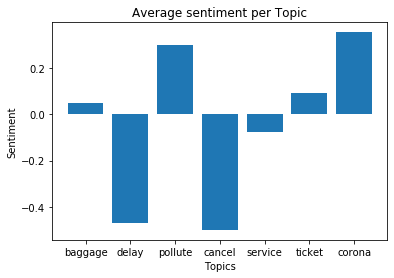

In [225]:
plt.bar(x_axis_sent, y_axis_topic)
plt.xlabel('Topics')
plt.ylabel('Sentiment')
plt.title('Average sentiment per Topic');
plt.savefig('SentimentTopic.png')

In [106]:
y_axis_klm = []
for key in topic_dict:
    df_key = df_correct[df_correct[topic_dict[key]] == 1]
    y_axis_klm.append(df_key[df_key['KLM'] == 1][topic_dict[key]].count())

In [107]:
y_axis_airways = []
for key in topic_dict:
    df_key = df_correct[df_correct[topic_dict[key]] == 1]
    y_axis_airways.append(df_key[df_key['British Airways'] == 1][topic_dict[key]].count())

In [108]:
y_axis_a_air = []
for key in topic_dict:
    df_key = df_correct[df_correct[topic_dict[key]] == 1]
    y_axis_a_air.append(df_key[df_key['American Air'] == 1][topic_dict[key]].count())

In [109]:
y_axis_luft = []
for key in topic_dict:
    df_key = df_correct[df_correct[topic_dict[key]] == 1]
    y_axis_luft.append(df_key[df_key['Lufthansa'] == 1][topic_dict[key]].count())

In [110]:
y_axis_r_air = []
for key in topic_dict:
    df_key = df_correct[df_correct[topic_dict[key]] == 1]
    y_axis_r_air.append(df_key[df_key['RyanAir'] == 1][topic_dict[key]].count())

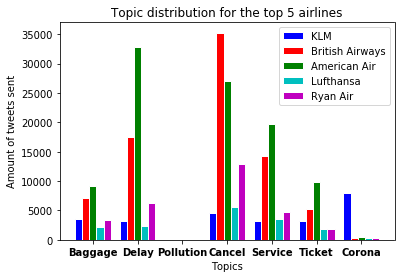

In [217]:
def showPlot(values, labels):
    fig, ax1 = plt.subplots()
    
    # set width of bar
    width = 0.8
    barWidth = width/5
    
    # Set position of bar on X axis
    r1 = np.arange(len(values[0]))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    r5 = [x + barWidth for x in r4]
    
    #Set precision bars
    color = '#A5CCE1'
    ax1.set_ylabel('Amount of tweets sent')
    ax1.set_xlabel('Topics')
    ax1.bar(r1, values[0], color='b', width=barWidth, edgecolor='white', label="KLM")
    ax1.bar(r2, values[1], color='r', width=barWidth, edgecolor='white', label="British Airways")
    ax1.bar(r3, values[2], color="g", width=barWidth, edgecolor='white', label="American Air")
    ax1.bar(r4, values[3], color="c", width=barWidth, edgecolor='white', label="Lufthansa")
    ax1.bar(r5, values[4], color="m", width=barWidth, edgecolor='white', label="Ryan Air")
    
    # Add xticks on the middle of the group bars
    ax1.set_xticks([r + width/2 - barWidth/2 for r in range(len(values[0]))])
    ax1.set_xticklabels(labels, fontweight='bold')
    
    #set title and legend and save the graph
    plt.title('Topic distribution for the top 5 airlines')
    plt.legend(['KLM', 'British Airways', 'American Air', 'Lufthansa', 'Ryan Air'])
    plt.savefig('TopicDistPlot.png')
showPlot([y_axis_klm,y_axis_airways,y_axis_a_air,y_axis_luft, y_axis_r_air], ["Baggage", 
                                                                              "Delay", "Pollution", "Cancel", "Service", "Ticket", "Corona"])

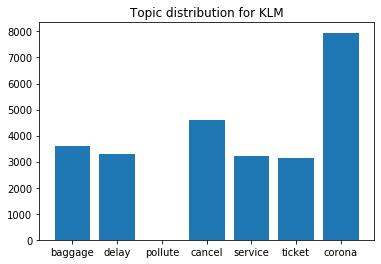

In [111]:
plt.bar(x_axis_topic, y_axis_klm)
plt.title('Topic distribution for KLM');

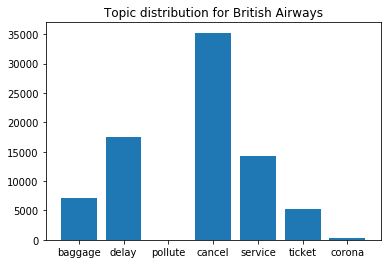

In [113]:
plt.bar(x_axis_topic, y_axis_airways)
plt.title('Topic distribution for British Airways');

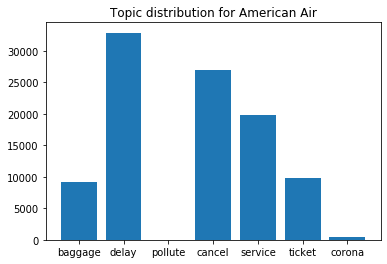

In [114]:
plt.bar(x_axis_topic, y_axis_a_air)
plt.title('Topic distribution for American Air');

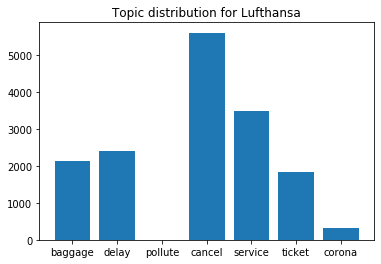

In [115]:
plt.bar(x_axis_topic, y_axis_luft)
plt.title('Topic distribution for Lufthansa');

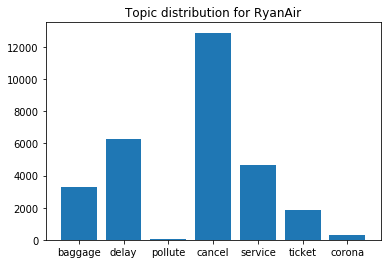

In [116]:
plt.bar(x_axis_topic, y_axis_r_air)
plt.title('Topic distribution for RyanAir');

In [130]:
export = df_correct.drop(['Unnamed: 0', 'newTopic'], axis = 1)

In [131]:
export.to_csv('combined_topic_correct.csv')

In [132]:
export.head()

,id_str,KLM,British Airways,American Air,Lufthansa,RyanAir,Topic,sentiment,Date,newDate,baggage,delay,pollute,cancel,service,ticket,corona
0,1131172858951024640,0,0,0,0,0,NaN,0,2019-05-22 12:20:00.406000,2019-05-22,0,0,0,0,0,0,0
2,1131172867985485824,0,1,0,0,0,NaN,0,2019-05-22 12:20:02.560000,2019-05-22,0,0,0,0,0,0,0
4,1131172975682605056,0,0,0,0,0,NaN,0,2019-05-22 12:20:28.237000,2019-05-22,0,0,0,0,0,0,0
5,1131173010235375616,0,0,0,0,0,NaN,-1,2019-05-22 12:20:36.475000,2019-05-22,0,0,0,0,0,0,0
9,1131173091651072000,0,0,0,0,0,NaN,0,2019-05-22 12:20:55.886000,2019-05-22,0,0,0,0,0,0,0
